In [29]:
import cv2

participant_number = '3'
video_path = f"./data/Videos/P{participant_number}.avi"


cap = cv2.VideoCapture(video_path)

In [20]:
from frame import Frame
from typing import List

frames: List[Frame] = []
cap = cv2.VideoCapture(video_path)
while True:
    ret, frame = cap.read()
    if not ret:
        break
    frames.append(Frame(len(frames), participant_number, frame))
cap.release()

In [ ]:
%load_ext autoreload
%autoreload 2
from face_analyzer import FaceAnalyzer
import random

face_analyzer = FaceAnalyzer()
frames_selection = random.sample(frames, 20)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Face

In [22]:
for frame in frames_selection:
    frame.face = face_analyzer.get_face(frame.image)

# Smile

In [23]:
for frame in frames_selection:
    frame.smile = face_analyzer.get_smile(frame.image, frame.face) if frame.face is not None else None

In [ ]:
for frame in frames_selection:
    frame.face_interest_points = face_analyzer.get_face_interest_points(frame)

# Display Frames

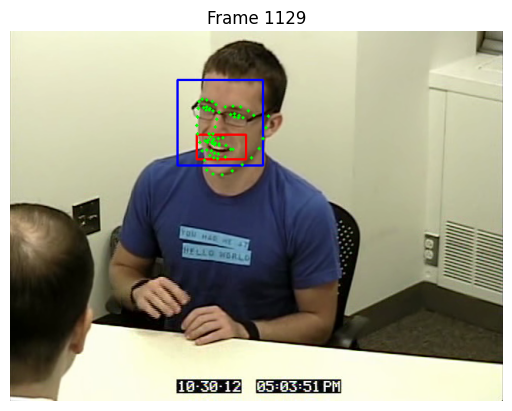

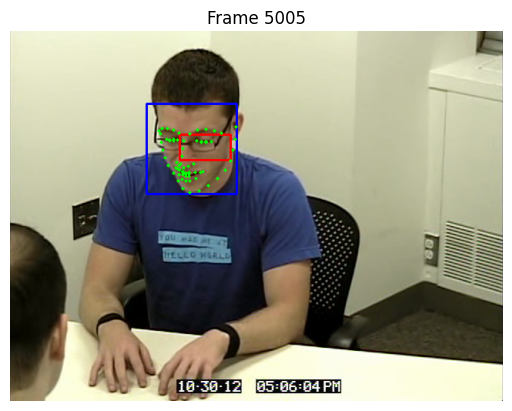

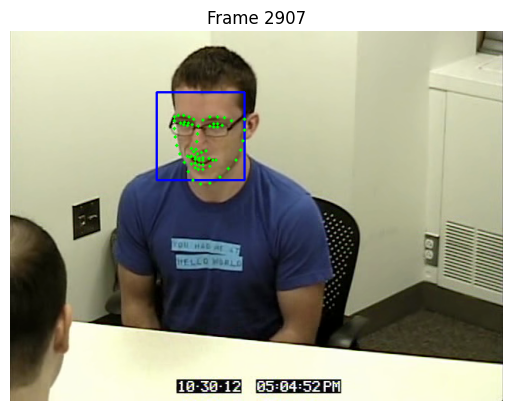

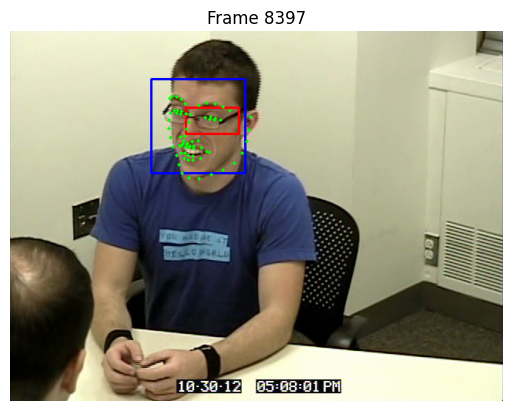

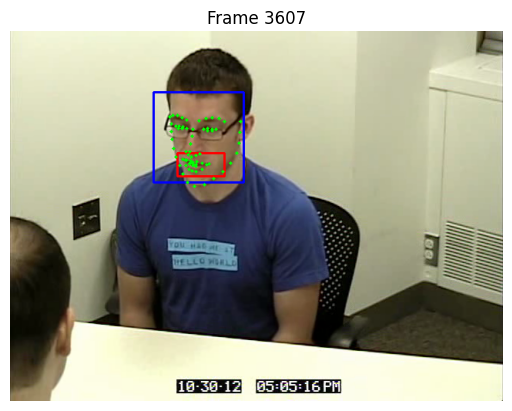

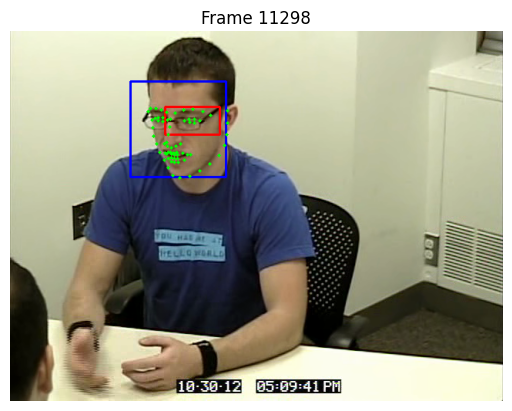

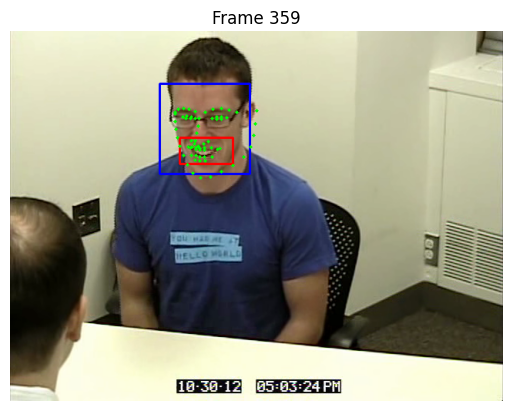

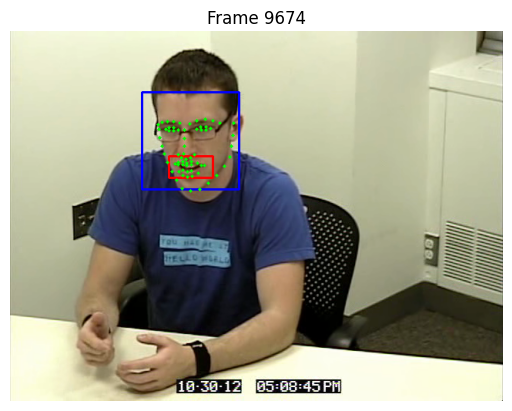

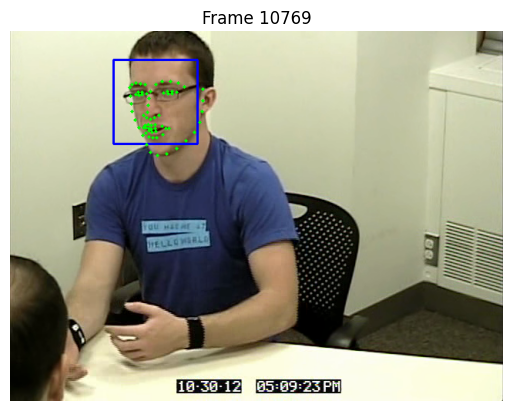

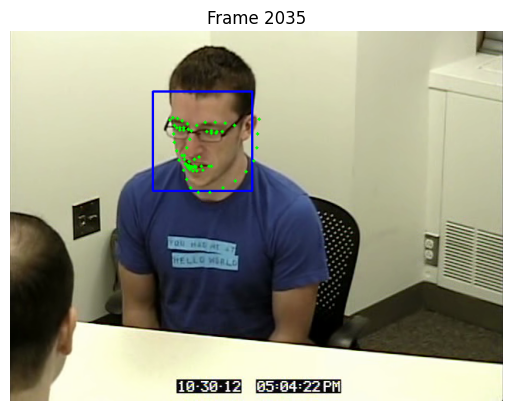

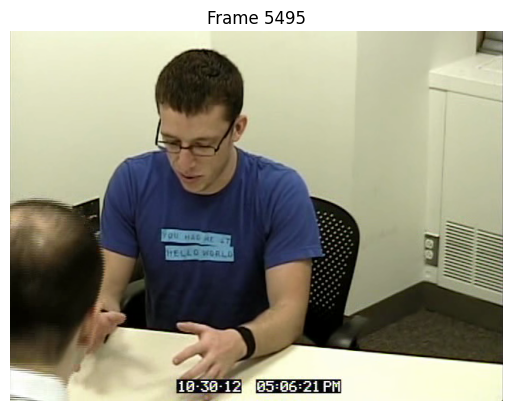

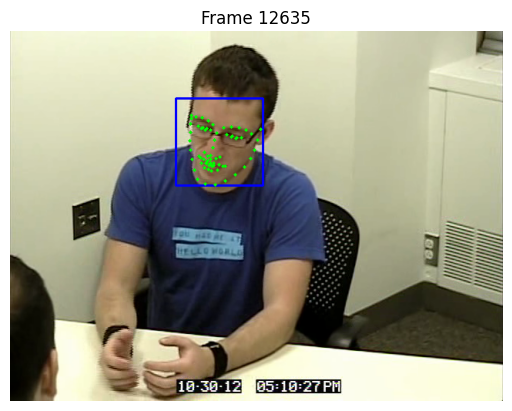

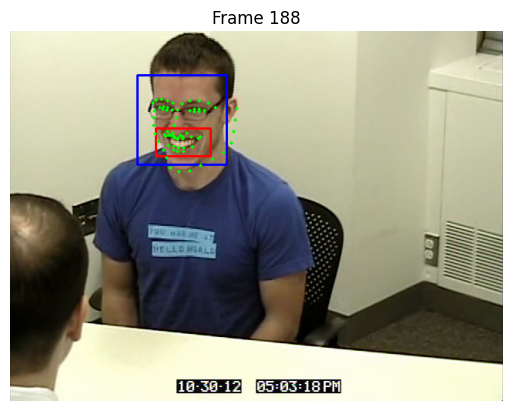

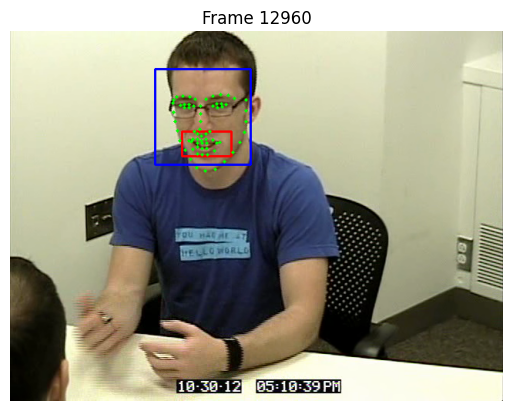

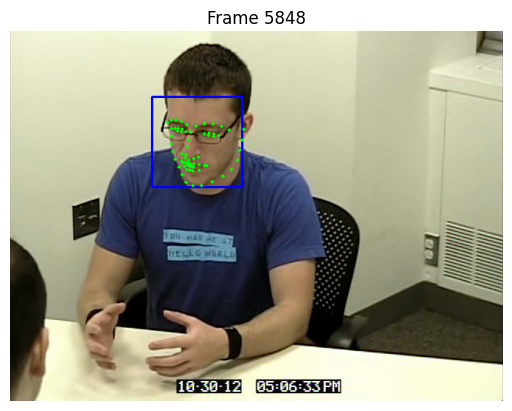

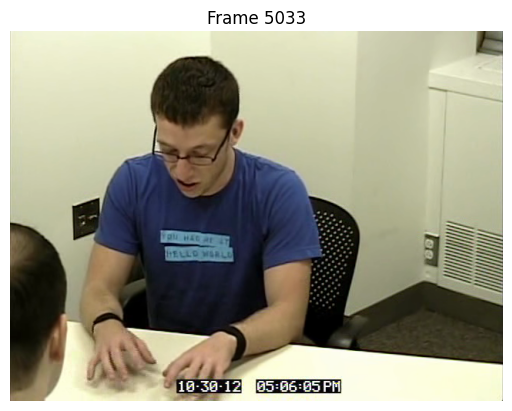

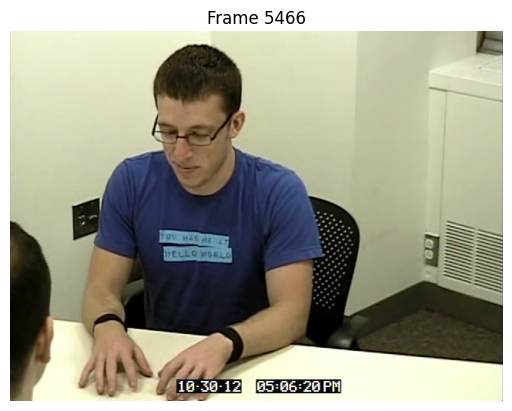

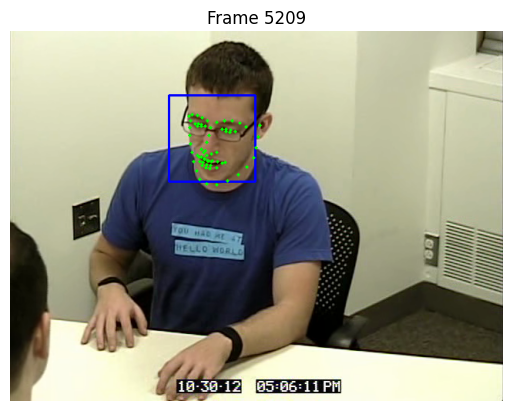

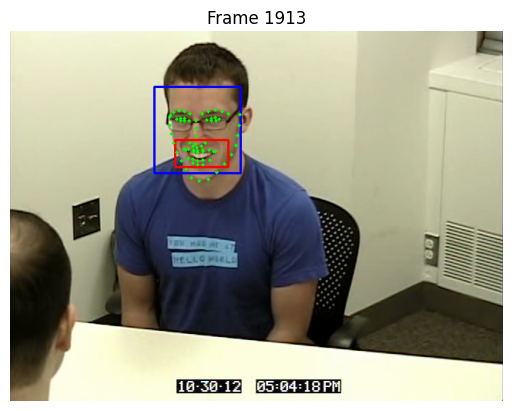

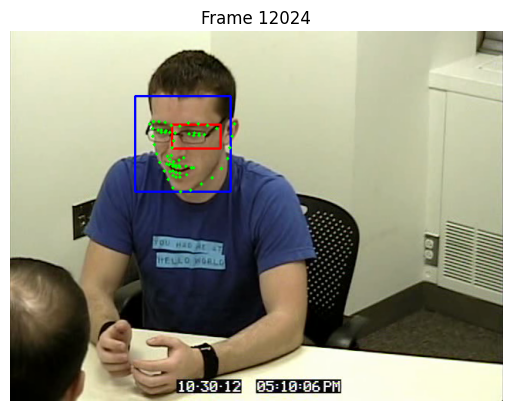

In [25]:
for frame in frames_selection:
    frame.create_drawable_image_copy()
    frame.draw_face()
    frame.draw_smile()
    frame.draw_facial_landmarks()
    frame.display()

# Eyebrows

In [28]:
from eye_brows import EyeBrows


for frame in frames:
    brow: EyeBrows = face_analyzer.get_eyebrows_coordinates(frame.landmarks)
    print(brow.left_brow)

NameError: name 'face_analyzer' is not defined